In [31]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

# 角点

角点是图像很重要的特征，对图像图形的理解和分析有很重要的作用，在保留图像图形重要特征的同时，
可以有效减少信息的数据量，使信息的含量很高，有效提高计算速度，有利于图像的可靠匹配，
使得实时处理成为可能。在物体识别、图像匹配、视觉跟踪和三维重建等方面有很重要的应用。
角点可以认为是窗口向任意方向的移动都导致图像灰度的明显变化。从图像分析的角度来定义角点可以有一下两种：
    1.角点可以是两个边缘的角点
    2.角点是邻域内具有两个主方向的特征点

---

前者往往需要对图像边缘进行编码，这在很大程度上依赖于图像的分割与边缘提取，具有相当大的难度和计算量，
且一旦待检测目标局部发生变化，很可能导致操作的失败。
角点检测算法可以归纳为三类：基于灰度图像的角点检测、基于二值图像的角点检测、基于轮廓曲线的角点检测。
基于灰度图像的检测又可细分为基于梯度、基于模板、基于模板梯度组合三类方法，其中基于模板的方法主要
考虑像素邻域点的灰度变化，即图像亮度的变化，将与邻点亮度对比足够大的点定义为角点。常见的基于模板的
角点检测算法有Kitchen-Rosenfeld角点检测,Harris角点检测算法，KLT角点检测和SUSAN角点检测。。

## cornerHarris

Harris角点检测原理

Harris角点检测是一种直接基于灰度图像的角点提取算法，稳定性高，尤其对L型角点检测精度高。
各个方向上移动这个特征的小窗口，窗口内区域的灰度发生了较大的变化，那么久认为在窗口内遇到了角点，
如果这个特定的窗口在图像各个方向上移动时，窗口内图像的灰度发生了很大变化，而在另一些方向上没有
发生变化，那么窗口内的图像可能就是一条直线的线段。

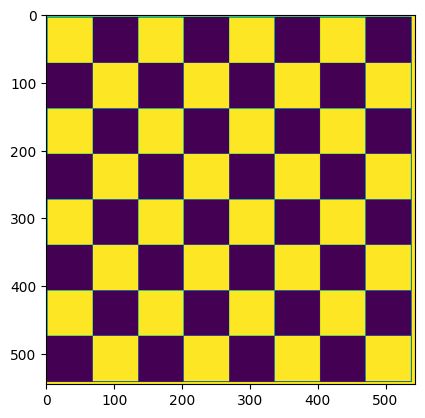

In [32]:
image = cv2.imread("../images/chessboard.jpg", flags=0)
plt.imshow(image)

In [33]:
corners = cv2.cornerHarris(
    src=image,      # 必须单通道
    blockSize=2,    # 邻域大小，可以查看cornerEigenValsAndVecs()得到更多关于blockSize的信息
    ksize=3,        # 表示Sobel()算子孔径大小
    k=0.04,         # Harris参数，用于判断是否为角点
)
print(corners.shape, corners.min(), corners.max())

(545, 544) -0.04 0.10839844


In [34]:
corner_normalize = cv2.normalize(
    src=corners,
    dst=None,
    alpha=0,
    beta=255,
    norm_type=cv2.NORM_MINMAX,
    dtype=cv2.CV_8UC1,
)

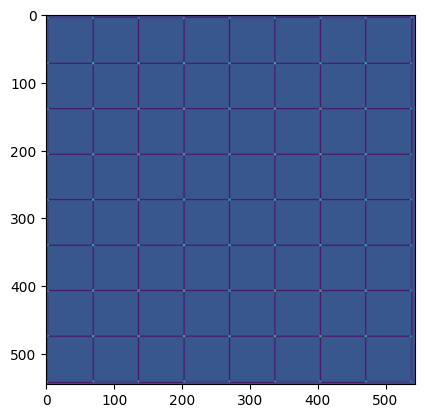

In [35]:
plt.imshow(corner_normalize)

Text(0.5, 1.0, 'image')

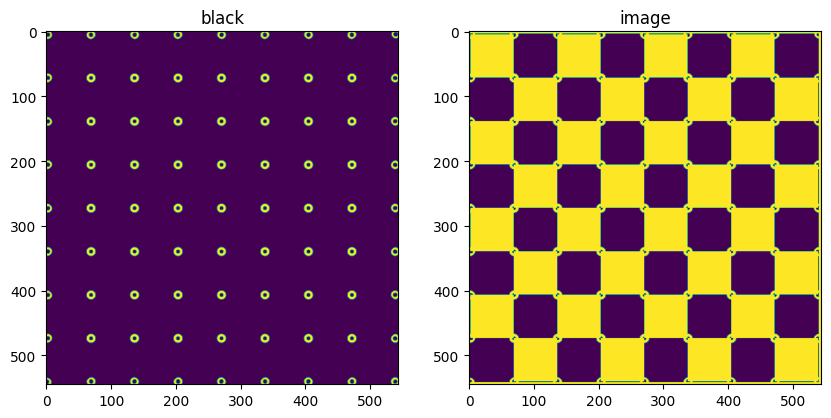

In [45]:
black = np.zeros(image.shape, dtype=np.uint8)
for x in range(image.shape[1]):
    for y in range(image.shape[0]):
        if corner_normalize[y, x] > 100:  # 只显示值大于100的
            cv2.circle(
                img=black,
                center=[x, y],
                radius=5,
                color=255,
                thickness=1,
                lineType=cv2.LINE_AA
            )

            cv2.circle(
                img=image,
                center=[x, y],
                radius=5,
                color=255,
                thickness=1,
                lineType=cv2.LINE_AA
            )
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].imshow(black)
axes[0].set_title("black")
axes[1].imshow(image)
axes[1].set_title("image")

## Shi-Tomasi角点检测

小尺度检测角点,大尺度不能检测

Shi-Tomasi算法是对Harris角点检测算法的改进，一般会比Harris算法得到更好的角点。Harris 算法的角点响应函数是将矩阵 M 的行列式值与 M 的迹相减，利用差值判断是否为角点。


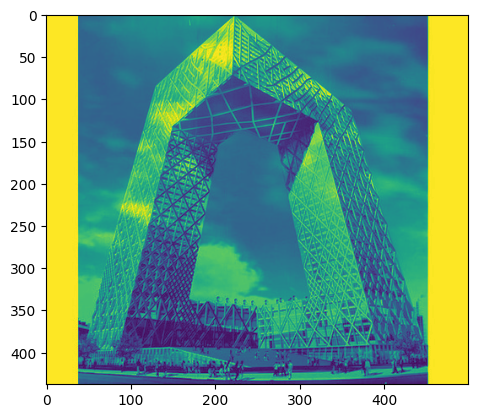

In [50]:
image1 = cv2.imread("../images/tv.jpg", flags=0)
plt.imshow(image1)

In [51]:
# 图像, 角点数目, 最低可接受的角点质量水平, 角点之间最小的欧式距离
corners1 = cv2.goodFeaturesToTrack(image1, 1000, 0.01, 10)
print(corners1.shape, corners1.min(), corners1.max())

(600, 1, 2) 3.0 451.0


Text(0.5, 1.0, 'image1')

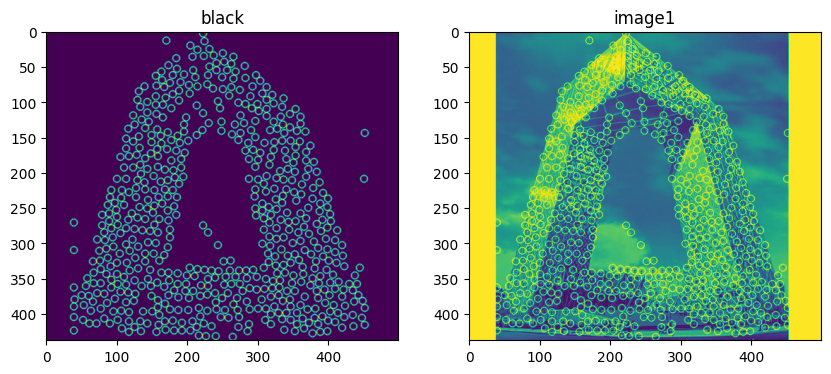

In [52]:
black = np.zeros(image1.shape, dtype=np.uint8)
for i in corners1:
    x, y = i.ravel()
    cv2.circle(
        img=black,
        center=[int(x), int(y)],
        radius=5,
        color=255,
        thickness=1,
        lineType=cv2.LINE_AA
    )

    cv2.circle(
        img=image1,
        center=[int(x), int(y)],
        radius=5,
        color=255,
        thickness=1,
        lineType=cv2.LINE_AA
    )
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
axes[0].imshow(black)
axes[0].set_title("black")
axes[1].imshow(image1)
axes[1].set_title("image1")

## SIFT和SURF算法

大小尺度都能找到

SIFT和SURF算法是受专利保护的，在使用他们时我们是要付费的，但是ORB（Oriented Fast and Rotated Brief）不需要，
它可以用来对图像中的关键点快速创建特征向量，并用这些特征向量来识别图像中的对象。

SIFT算法的实质是在不同的尺度空间上查找关键点(特征点)，并计算出关键点的方向。
SIFT所查找到的关键点是一些十分突出，不会因光照，仿射变换和噪音等因素而变化的点，如角点、边缘点、暗区的亮点及亮区的暗点等。

cv.drawKeypoints(image, keypoints, outputimage, color, flags)

参数：

- image: 原始图像
- keypoints：关键点信息，将其绘制在图像上
- outputimage：输出图片，可以是原始图像
- color：颜色设置，通过修改（b,g,r）的值,更改画笔的颜色，b=蓝色，g=绿色，r=红色。
- flags：绘图功能的标识设置
    - cv2.DRAW_MATCHES_FLAGS_DEFAULT：创建输出图像矩阵，使用现存的输出图像绘制匹配对和特征点，对每一个关键点只绘制中间点
    - cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG：不创建输出图像矩阵，而是在输出图像上绘制匹配对
    - cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS：对每一个特征点绘制带大小和方向的关键点图形
    - cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS：单点的特征点不被绘制

SURF算法：对SIFT算法的改进，在尺度空间极值检测，关键点方向确定，关键点描述方面都有改进，提高效率

```python
# 2.sift关键字检测
# 2.1 实例化sift对象
# 这个版本没有这个方法
sift = cv.xfeatures2d.SIFT_create()

# 2.2 关键点检测：kp关键点信息包括方向，尺度，位置信息，des是关键点的描述符
kp,des = sift.detectAndCompute(gray,None)

# 2.3 在图像上绘制关键点的检测结果
cv.drawKeypoints(img, kp, img, flags=cv.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
```

# FAST

FAST(全称Features from accelerated segment test)是一种用于角点检测的算法，
该算法的原理是取图像中检测点，以该点为圆心的周围邻域内像素点判断检测点是否为角点，
通俗的讲就是若一个像素周围有一定数量的像素与该点像素值不同，则认为其为角点。


OpenCV中的FAST检测算法是用传统方法实现的，

1.实例化fast
```
fast = cv2.FastFeatureDetector_create( threshold, nonmaxSuppression)
参数：
    threshold：阈值t，有默认值10
    nonmaxSuppression：是否进行非极大值抑制，默认值True
返回：
    Fast：创建的FastFeatureDetector对象
```

2.利用fast.detect检测关键点，没有对应的关键点描述
```
kp = fast.detect(grayImg, None)
参数：
    gray: 进行关键点检测的图像，注意是灰度图像
返回：
    kp: 关键点信息，包括位置，尺度，方向信息
```

3.将关键点检测结果绘制在图像上，与在sift中是一样的
```
cv2.drawKeypoints(image, keypoints, outputimage, color, flags)
```

Fast算法得出的角点多

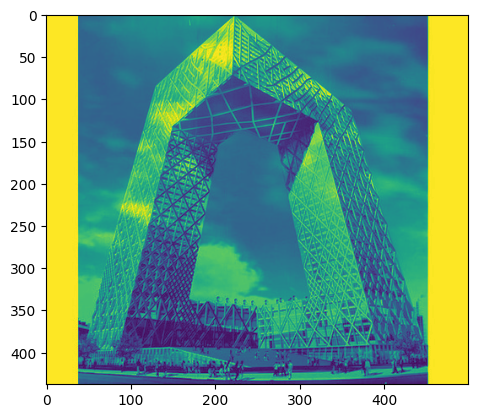

In [56]:
image2 = cv2.imread("../images/tv.jpg", flags=0)
plt.imshow(image2)

In [57]:
fast = cv2.FastFeatureDetector_create(threshold=30)
fast

< cv2.FastFeatureDetector 000001FFA6F3F250>

In [59]:
kp = fast.detect(image2, None)
len(kp)

3556

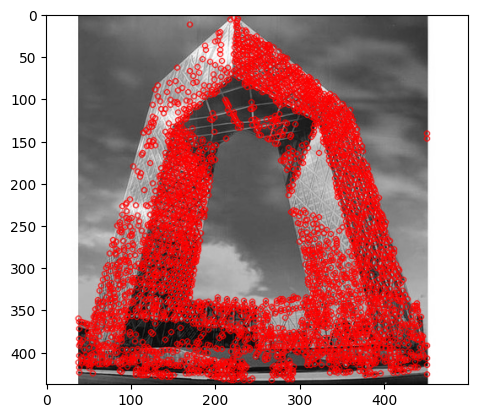

In [60]:
image3 = cv2.drawKeypoints(image2, kp, None, color=255)

In [61]:
print("Threshold: {}".format(fast.getThreshold()))
print("nonmaxSuppression:{}".format(fast.getNonmaxSuppression()))
print("neighborhood: {}".format(fast.getType()))

Threshold: 30
nonmaxSuppression:True
neighborhood: 2


In [62]:
fast.setNonmaxSuppression(0)
kp1 = fast.detect(image2, None)
len(kp1)

9000

In [63]:
image4 = cv2.drawKeypoints(image2, kp, None, color=255)

Text(0.5, 1.0, 'without nms')

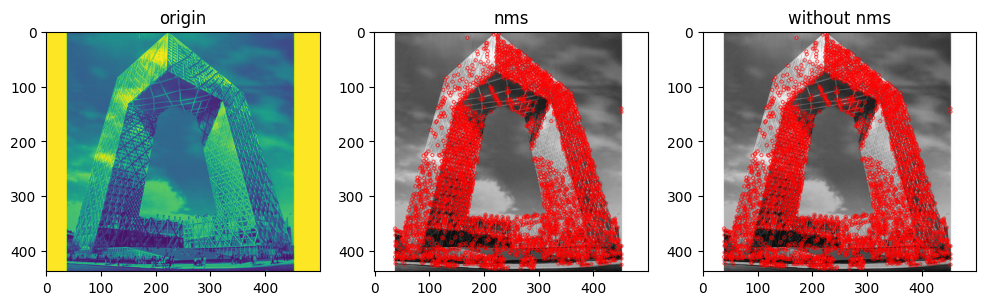

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 10))
axes[0].imshow(image2)
axes[0].set_title("origin")
axes[1].imshow(image3)
axes[1].set_title("nms")
axes[2].imshow(image4)
axes[2].set_title("without nms")

# ORB

SIFT和SURF算法是受专利保护的，在使用他们时我们是要付费的，但是ORB（Oriented Fast and Rotated Brief）不需要，
它可以用来对图像中的关键点快速创建特征向量，并用这些特征向量来识别图像中的对象。

在OPenCV中实现ORB算法，使用的是：
1.实例化ORB
```python
orb = cv2.xfeatures2d.orb_create(nfeatures)
参数：
    nfeatures: 特征点的最大数量
```

2.利用orb.detectAndCompute()检测关键点并计算
```python
kp,des = orb.detectAndCompute(gray,None)
参数：
    gray: 进行关键点检测的图像，注意是灰度图像
返回：
    kp: 关键点信息，包括位置，尺度，方向信息
    des: 关键点描述符，每个关键点BRIEF特征向量，二进制字符串，
```

3.将关键点检测结果绘制在图像上
```python
cv2.drawKeypoints(image, keypoints, outputimage, color, flags)
```

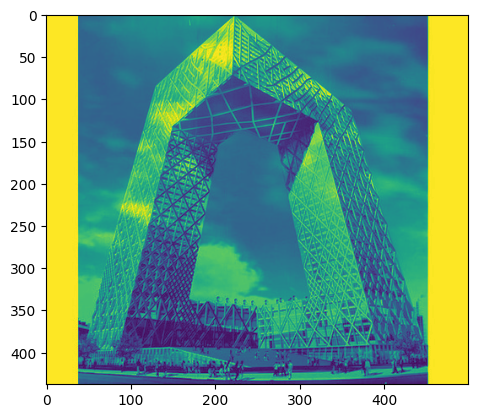

In [67]:
image5 = cv2.imread("../images/tv.jpg", flags=0)
plt.imshow(image5)

In [68]:
orb = cv2.ORB_create(nfeatures=1000)
orb

< cv2.ORB 000001FFA90460F0>

In [69]:
kp, des = orb.detectAndCompute(image5, None)
des.shape

(1000, 32)

In [70]:
image6 = cv2.drawKeypoints(image5, kp, None, color=(0, 0, 255), flags=0)

Text(0.5, 1.0, 'orb')

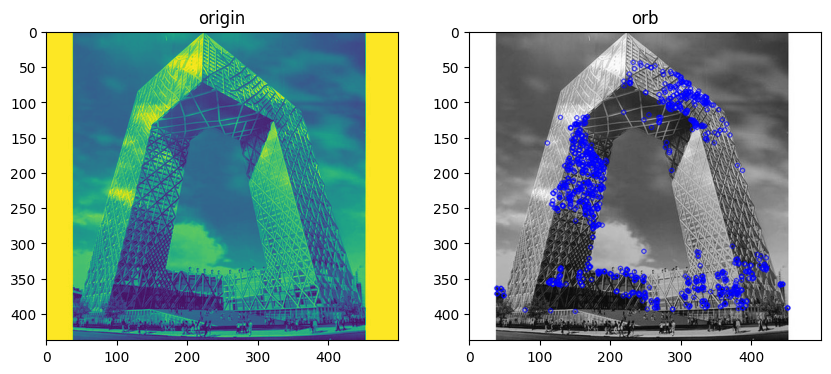

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(image5)
axes[0].set_title("origin")
axes[1].imshow(image6)
axes[1].set_title("orb")